# Data Cleaning 

In [35]:
import pandas as pd
import re

# NLP packages
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.isri import ISRIStemmer
from nltk.stem import PorterStemmer
from farasa.stemmer import FarasaStemmer

# EDA packages 
from plotnine import *
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# my functions
from func import *




In [2]:
pd.set_option('max_colwidth',150)

## Arabic Quran

In [3]:
# reading the Arabic Quran version.
quran_A = pd.read_csv("../data/quran-simple.txt", names=["chapter_num", "verse_num", "verse"], sep="|" )
quran_A.head(10)

,chapter_num,verse_num,verse
0,1,1.0,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ
1,1,2.0,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ
2,1,3.0,الرَّحْمَٰنِ الرَّحِيمِ
3,1,4.0,مَالِكِ يَوْمِ الدِّينِ
4,1,5.0,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ
5,1,6.0,اهْدِنَا الصِّرَاطَ الْمُسْتَقِيمَ
6,1,7.0,صِرَاطَ الَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْرِ الْمَغْضُوبِ عَلَيْهِمْ وَلَا الضَّالِّينَ
7,2,1.0,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ الم
8,2,2.0,ذَٰلِكَ الْكِتَابُ لَا رَيْبَ فِيهِ هُدًى لِّلْمُتَّقِينَ
9,2,3.0,الَّذِينَ يُؤْمِنُونَ بِالْغَيْبِ وَيُقِيمُونَ الصَّلَاةَ وَمِمَّا رَزَقْنَاهُمْ يُنفِقُونَ


In [4]:
# taking a look at our data
quran_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   chapter_num  6264 non-null   object 
 1   verse_num    6236 non-null   float64
 2   verse        6236 non-null   object 
dtypes: float64(1), object(2)
memory usage: 146.9+ KB


- there are around 30 missing values in both verse_num and verse columns.
- verse_num Dtype is float but it should be integer.

In [5]:
# looking at the missing data
quran_A[quran_A.verse.isnull()]

,chapter_num,verse_num,verse
6236,# PLEASE DO NOT REMOVE OR CHANGE THIS COPYRIGHT BLOCK,NaN,NaN
6237,#====================================================================,NaN,NaN
6238,#,NaN,NaN
6239,"# Tanzil Quran Text (Simple, Version 1.1)",NaN,NaN
6240,# Copyright (C) 2007-2022 Tanzil Project,NaN,NaN
6241,# License: Creative Commons Attribution 3.0,NaN,NaN
6242,#,NaN,NaN
6243,"# This copy of the Quran text is carefully produced, highly",NaN,NaN
6244,# verified and continuously monitored by a group of specialists,NaN,NaN
6245,# at Tanzil Project.,NaN,NaN


In [6]:
# droping these inequivalent rows.
quran_A.dropna(inplace=True)

In [7]:
# adjusting the types.
quran_A["chapter_num"]=quran_A.chapter_num.astype(int)
quran_A["verse_num"]=quran_A.verse_num.astype(int)
quran_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6236 entries, 0 to 6235
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   chapter_num  6236 non-null   int64 
 1   verse_num    6236 non-null   int64 
 2   verse        6236 non-null   object
dtypes: int64(2), object(1)
memory usage: 194.9+ KB


In [8]:
# checking the 1st verse of each chapter.
quran_A[quran_A.verse_num == 1]

,chapter_num,verse_num,verse
0,1,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ
7,2,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ الم
293,3,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ الم
493,4,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ يَا أَيُّهَا النَّاسُ اتَّقُوا رَبَّكُمُ الَّذِي خَلَقَكُم مِّن نَّفْسٍ وَاحِدَةٍ وَخَلَقَ مِنْهَا زَوْجَهَ...
669,5,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ يَا أَيُّهَا الَّذِينَ آمَنُوا أَوْفُوا بِالْعُقُودِ أُحِلَّتْ لَكُم بَهِيمَةُ الْأَنْعَامِ إِلَّا مَا يُتْ...
...,...,...,...
6213,110,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ إِذَا جَاءَ نَصْرُ اللَّهِ وَالْفَتْحُ
6216,111,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ تَبَّتْ يَدَا أَبِي لَهَبٍ وَتَبَّ
6221,112,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ قُلْ هُوَ اللَّهُ أَحَدٌ
6225,113,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ قُلْ أَعُوذُ بِرَبِّ الْفَلَقِ


- some scholars say that "بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ" is a part of each chapter, so it shoul be numbered.
- other scholars say that it is not a part of each chapter, so it should not be counted.(this is why this verse is not at the first of each chapter in the translated version)
- all scholars agree that it is a part of the first chapter (الفاتحة) and it is not a part of the 9th chapter (التوبة).



## English quran

In [9]:
# reading an English translation version.
quran_E = pd.read_csv("../data/english_saheeh_v1.1.0-csv.1.csv")
quran_E.head()

,id,sura,aya,translation,footnotes
0,1,1,1,"(1) In the name of Allāh,[2] the Entirely Merciful, the Especially Merciful.[3]","[2]- Allāh is a proper name belonging only to the one Almighty God, Creator and Sustainer of the heavens and the earth and all that is within them..."
1,2,1,2,"(2) [All] praise is [due] to Allāh, Lord[4] of the worlds -","[4]- When referring to Allāh (subḥānahu wa taʿālā) , the Arabic term ""rabb"" (translated as ""Lord"") includes all of the following meanings: ""owner,..."
2,3,1,3,"(3) The Entirely Merciful, the Especially Merciful,",NaN
3,4,1,4,(4) Sovereign of the Day of Recompense.[5],"[5]- i.e., repayment and compensation for whatever was earned of good or evil during life on this earth."
4,5,1,5,(5) It is You we worship and You we ask for help.,NaN


In [10]:
# taking a look at our data.
quran_E.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6236 non-null   int64 
 1   sura         6236 non-null   int64 
 2   aya          6236 non-null   int64 
 3   translation  6236 non-null   object
 4   footnotes    1612 non-null   object
dtypes: int64(3), object(2)
memory usage: 243.7+ KB


In [11]:
# we are not intersted in the footnotes and id is just an index.
quran_E.drop(columns=["footnotes", "id"], inplace=True)

In [12]:
# matching the names of the columns.
quran_E.columns=["chapter_num", "verse_num", "verse"]
quran_E

,chapter_num,verse_num,verse
0,1,1,"(1) In the name of Allāh,[2] the Entirely Merciful, the Especially Merciful.[3]"
1,1,2,"(2) [All] praise is [due] to Allāh, Lord[4] of the worlds -"
2,1,3,"(3) The Entirely Merciful, the Especially Merciful,"
3,1,4,(4) Sovereign of the Day of Recompense.[5]
4,1,5,(5) It is You we worship and You we ask for help.
...,...,...,...
6231,114,2,"(2) The Sovereign of mankind,"
6232,114,3,"(3) The God of mankind,"
6233,114,4,(4) From the evil of the retreating whisperer[2016] -
6234,114,5,(5) Who whispers [evil] into the breasts of mankind -


## creating functions to clean our data.

In [13]:
def cleaning(verse):
    # for the Arabic version
    verse = re.sub("[ًًٌٌٍٍَُِّّْٰٓٓ]","",verse)
    verse = re.sub("[آ]","ا",verse)

    # for the English transelation
    verse = verse.lower()
    verse = re.sub("\[.*?\]","",verse)
    verse = re.sub("[(0-9)]","",verse)
    verse = re.sub("[-.\",ʿ‘،`\?';:]","",verse)
    verse = re.sub("  "," ",verse)
    verse = verse.strip()

    return verse

cleaning(quran_A.verse[1039])


'ولا تقعدوا بكل صراط توعدون وتصدون عن سبيل الله من امن به وتبغونها عوجا واذكروا إذ كنتم قليلا فكثركم وانظروا كيف كان عاقبة المفسدين'

In [14]:
# removing the basmelah of the first verse in each chapter.
def remove_basmalah(first_aya):
    """removing unwanted extra basmalas"""
    # Note that the space at the is important to dodge removing wanted basmalah
    first_aya = re.sub("بسم الله الرحمن الرحيم ", "", first_aya) 

    return first_aya

remove_basmalah(cleaning(quran_A.verse[0]))


'بسم الله الرحمن الرحيم'

In [15]:
# creating a function to add a basmalah at the begining of each chapter with verse_num = 0
def add_basmalah(quran, language):
    
    """This function will insert a 'basmalah' at the start of each chapter with verse_num = 0"""

    if language == "A":
        b = "بسم الله الرحمن الرحيم"
    elif language == "E":
        b = "in the name of allāh the entirely merciful the especially merciful"
    else:
        print("invalide value or language; 'A' for Arabic or 'E' for English")
    
    a = list(quran[quran.verse_num == 1].index)
    a.remove(0)
    
    for chapter, i in enumerate(a):
        quran.loc[i-0.5] = {"chapter_num":chapter + 2,"verse_num":0,"verse":b}
    
    quran.iloc[0].verse = b

    quran = quran.drop(index= quran[(quran.chapter_num == 9) & (quran.verse_num == 0)].index)
    quran = quran.sort_index().reset_index(drop= True)
    return quran


In [16]:
# Adding a column that massures the length of each vrrse.
def word_count(text):
    return len(text.split())
    

In [17]:
# applying our functions on the English translation

quran_E["verse"] = quran_E.verse.apply(cleaning)
quran_E = add_basmalah(quran_E, "E")
quran_E["length"] = quran_E.verse.apply(word_count)
quran_E.head(5)


/tmp/ipykernel_26064/168312535.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quran.iloc[0].verse = b


,chapter_num,verse_num,verse,length
0,1,1,in the name of allāh the entirely merciful the especially merciful,11
1,1,2,praise is to allāh lord of the worlds,8
2,1,3,the entirely merciful the especially merciful,6
3,1,4,sovereign of the day of recompense,6
4,1,5,it is you we worship and you we ask for help,11


In [18]:
# applying our functions to clean the Arabic data.
quran_A["verse"] = quran_A.verse.apply(cleaning)
quran_A["verse"] = quran_A.verse.apply(remove_basmalah)
quran_A = add_basmalah(quran_A, "A")
quran_A["length"] = quran_A.verse.apply(word_count)

quran_A.head(5)

/tmp/ipykernel_26064/168312535.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quran.iloc[0].verse = b


,chapter_num,verse_num,verse,length
0,1,1,بسم الله الرحمن الرحيم,4
1,1,2,الحمد لله رب العالمين,4
2,1,3,الرحمن الرحيم,2
3,1,4,مالك يوم الدين,3
4,1,5,إياك نعبد وإياك نستعين,4


## creat a quranic by chapter dataFrame

### Arabic by chapter quran

In [19]:
by_chapter =quran_A.groupby("chapter_num").length.agg(["mean","sum","count"])

In [20]:
def combine(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    
    combined_text = ' '.join(list_of_text)
    return combined_text

by_chapter["verses"]=quran_A.groupby("chapter_num").verse.apply(combine)
by_chapter.head()


,mean,sum,count,verses
chapter_num,,,,
1,4.142857,29,7,بسم الله الرحمن الرحيم الحمد لله رب العالمين الرحمن الرحيم مالك يوم الدين إياك نعبد وإياك نستعين اهدنا الصراط المستقيم صراط الذين أنعمت عليهم غير ...
2,21.411150,6145,287,بسم الله الرحمن الرحيم الم ذلك الكتاب لا ريب فيه هدى للمتقين الذين يؤمنون بالغيب ويقيمون الصلاة ومما رزقناهم ينفقون والذين يؤمنون بما أنزل إليك وم...
3,17.437811,3505,201,بسم الله الرحمن الرحيم الم الله لا إله إلا هو الحي القيوم نزل عليك الكتاب بالحق مصدقا لما بين يديه وأنزل التوراة والإنجيل من قبل هدى للناس وأنزل ا...
4,21.282486,3767,177,بسم الله الرحمن الرحيم يا أيها الناس اتقوا ربكم الذي خلقكم من نفس واحدة وخلق منها زوجها وبث منهما رجالا كثيرا ونساء واتقوا الله الذي تساءلون به وا...
5,23.479339,2841,121,بسم الله الرحمن الرحيم يا أيها الذين امنوا أوفوا بالعقود أحلت لكم بهيمة الأنعام إلا ما يتلى عليكم غير محلي الصيد وأنتم حرم إن الله يحكم ما يريد يا...


In [22]:
# Adding a nuzol column stating wether each chapter is madani or makki acording to مصحف المدينة المنورة
Madani = [2,3,4,5,8,9,13,22,24,33,47,48,49,55,57,58,59,60,61,62,63,64,65,66,76,98,99,110]

by_chapter["nuzol"] = "Makki"

by_chapter.nuzol.loc[Madani] = "Madani"
by_chapter.columns=["avr_verse_length", "length", "num_verses","verses","nuzol"]
by_chapter

/tmp/ipykernel_26064/2733160427.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_chapter.nuzol.loc[Madani] = "Madani"


,avr_verse_length,length,num_verses,verses,nuzol
chapter_num,,,,,
1,4.142857,29,7,بسم الله الرحمن الرحيم الحمد لله رب العالمين الرحمن الرحيم مالك يوم الدين إياك نعبد وإياك نستعين اهدنا الصراط المستقيم صراط الذين أنعمت عليهم غير ...,Makki
2,21.411150,6145,287,بسم الله الرحمن الرحيم الم ذلك الكتاب لا ريب فيه هدى للمتقين الذين يؤمنون بالغيب ويقيمون الصلاة ومما رزقناهم ينفقون والذين يؤمنون بما أنزل إليك وم...,Madani
3,17.437811,3505,201,بسم الله الرحمن الرحيم الم الله لا إله إلا هو الحي القيوم نزل عليك الكتاب بالحق مصدقا لما بين يديه وأنزل التوراة والإنجيل من قبل هدى للناس وأنزل ا...,Madani
4,21.282486,3767,177,بسم الله الرحمن الرحيم يا أيها الناس اتقوا ربكم الذي خلقكم من نفس واحدة وخلق منها زوجها وبث منهما رجالا كثيرا ونساء واتقوا الله الذي تساءلون به وا...,Madani
5,23.479339,2841,121,بسم الله الرحمن الرحيم يا أيها الذين امنوا أوفوا بالعقود أحلت لكم بهيمة الأنعام إلا ما يتلى عليكم غير محلي الصيد وأنتم حرم إن الله يحكم ما يريد يا...,Madani
...,...,...,...,...,...
110,5.750000,23,4,بسم الله الرحمن الرحيم إذا جاء نصر الله والفتح ورأيت الناس يدخلون في دين الله أفواجا فسبح بحمد ربك واستغفره إنه كان توابا,Madani
111,4.500000,27,6,بسم الله الرحمن الرحيم تبت يدا أبي لهب وتب ما أغنى عنه ماله وما كسب سيصلى نارا ذات لهب وامرأته حمالة الحطب في جيدها حبل من مسد,Makki
112,3.800000,19,5,بسم الله الرحمن الرحيم قل هو الله أحد الله الصمد لم يلد ولم يولد ولم يكن له كفوا أحد,Makki


#### Stemming

- "تجعلون", "يجعلان" and "أتجعل" all represent one word "جعل" ,but if we did not stemm them they will be counted as different words.

- stemming them now will be usfull later.

In [23]:
# Let's take a look at nltk's Arabic stemmer.

st = ISRIStemmer()

w= "بسم الله الرحمن الرحيم يا أيها الناس اتقوا ربكم الذي خلقكم من نفس واحدة وخلق منها زوجها وبث منهما"

" ".join([ st.stem(a) for a in word_tokenize(w)])

'بسم الل رحم رحم يا ايه ناس اتق ربكم الذي خلق من نفس وحد خلق منها زوج وبث منه'

There are three main problem inthis stemmer:
- stemming "الله" to "الل" does not make sense.
- "ربكم" should be easily stemmed to "رب" but it was not.
- similarly "وبث" should be easily stemmed to "بث" but it was not.

In [24]:
# Let's take a look at Farasa stemmer.
stemmer = FarasaStemmer()

stemmer.stem(w)

'بسم الله رحمن رحيم يا أي ناس اتقى رب الذي خلق من نفس واحد خلق من زوج بث من'

Farasa stemmer did solve the issiues we faced using ISRI stemmer, but Farasa stemmer is much slower than ISRI stemmer.
Anyway we will use Farasa stemmer and will pay the time needed.

In [ ]:
# # stemming each chapter.
# by_chapter["stemmed"] = by_chapter.chapter_verses.apply(stemmer.stem)
# by_chapter=by_chapter[["avr_verse_length", "length", "num_verses","nuzol","verses","stemmed"]]
# by_chapter.to_pickle("../pickle/A_by_chapter.pkl")
# by_chapter

# # this took 48 minutes, so to save time we can just read this dataframe
# # that is way it was pickled for later use.

In [25]:


# updating the by_chapter to add stemmed column.
by_chapter = pd.read_pickle("../pickle/A_by_chapter.pkl")

In [ ]:
# # stemming each verse 
# quran_A["stemmed"] = quran_A.verse.apply(stemmer.stem)
# quran_A.to_pickle("../pickle/quran_A_stemmed.pkl")
# quran_A

# # this took 480 minutes, so to save time we can just read this dataframe


In [ ]:
# updating the quran_A to add stemmed column.
quran_A = pd.read_pickle("../pickle/quran_A_stemmed.pkl")

## English

In [30]:
# creating a by chapter version of the translated quran.
E_by_chapter =quran_E.groupby("chapter_num").length.agg(["mean","sum","count"])

E_by_chapter["verses"]=quran_E.groupby("chapter_num").verse.apply(combine)
E_by_chapter.head()

,mean,sum,count,verses
chapter_num,,,,
1,10.142857,71,7,in the name of allāh the entirely merciful the especially merciful praise is to allāh lord of the worlds the entirely merciful the especially merc...
2,40.404181,11596,287,in the name of allāh the entirely merciful the especially merciful alif lām meem this is the book about which there is no doubt a guidance for tho...
3,32.985075,6630,201,in the name of allāh the entirely merciful the especially merciful alif lām meem allāh there is no deity except him the everliving the selfsustain...
4,38.926554,6890,177,in the name of allāh the entirely merciful the especially merciful o mankind fear your lord who created you from one soul and created from it its ...
5,44.024793,5327,121,in the name of allāh the entirely merciful the especially merciful o you who have believed fulfill contracts lawful for you are the animals of gra...


In [31]:
# adding makki or madani column.
E_by_chapter["nuzol"]=by_chapter.nuzol
E_by_chapter.columns=["avr_verse_length", "length", "num_verses","verses","nuzol"]

In [32]:
# stemming the verses

E_stemmer = PorterStemmer()
E_by_chapter["stemmed"]=E_by_chapter.verses.apply(lambda x: " ".join([ E_stemmer.stem(a) for a in word_tokenize(x)]))
E_by_chapter=E_by_chapter[["avr_verse_length", "length", "num_verses","nuzol","verses","stemmed"]]
E_by_chapter.to_pickle("../pickle/E_by_chapter.pkl")

# EDA

## Is there a significant difference between Makki and Madani chapters?

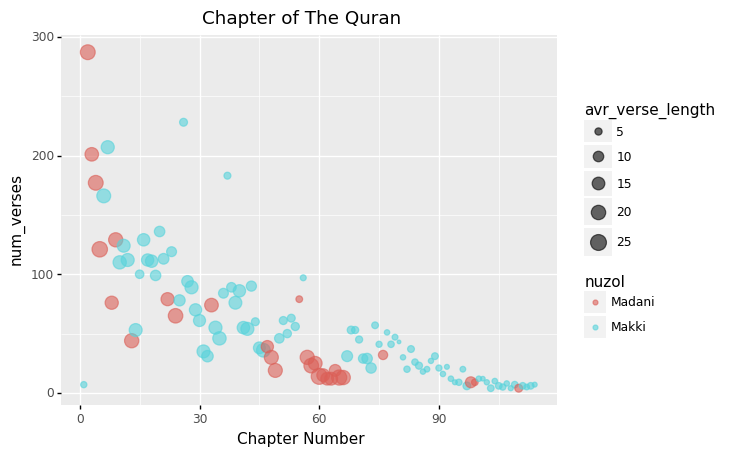

<ggplot: (8763785342398)>

In [36]:

(ggplot(data= by_chapter)
 + geom_point(aes(by_chapter.index,"num_verses", size="avr_verse_length", color="nuzol"),alpha= 0.6)
+ ggtitle("Chapter of The Quran")
+ xlab("Chapter Number"))

In [39]:
# creating a summery table to  look at makki & madani chapters
nuzol = by_chapter.groupby("nuzol").length.agg(["mean","sum","count"])
nuzol["percentage"] = (nuzol["sum"]/nuzol["sum"].sum())*100
nuzol.columns = ["avg_words", "total_words", "count", "percentage_words"]
nuzol = nuzol[["avg_words","total_words","percentage_words", "count"]]

# will be used below
nuzol["stemmed_verses"]=by_chapter.groupby("nuzol").stemmed.apply(combine)
nuzol


,avg_words,total_words,percentage_words,count,stemmed_verses
nuzol,,,,,
Madani,1081.071429,30270,38.684695,28,بسم الله رحمن رحيم الم ذلك كتاب لا ريب في هدى متقي الذي آمن غيب أقام صلاة من رزقناهم أنفق الذي آمن ما أنزل إلى ما أنزل من قبل اخر هم يوقن أولائك ع...
Makki,557.883721,47978,61.315305,86,بسم الله رحمن رحيم حمد الله رب عالم رحمن رحيم مالك يوم دين إياك عبد إياك استعان اهد صراط مستقيم صراط الذي أنعم على غير مغضوب على لا ضال بسم الله ر...


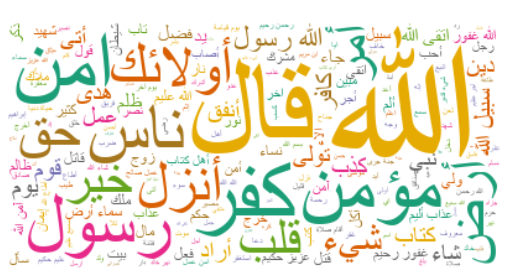

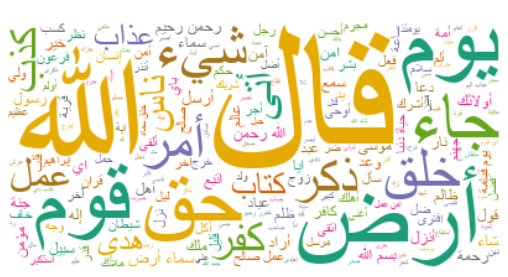

In [40]:
# creating word clouds.

stopwords_list=stopwords.words("arabic")

for i in [0,1]:
    wc =word_cloud_generater(nuzol.stemmed_verses[i], stopwords_list)

    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1+i)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(nuzol.index[i], color="white")



- we can notice that some words are frecuent in **Madani**'s chapters, but not in Makki chapters. such as **{مؤمن, كفر, رسول,قلب,}**
- on the other hand **{يوم, عذاب, قوم}** are more comen in the **Makki** chapters.

In [41]:
E_nuzol = E_by_chapter.groupby("nuzol").length.agg(["mean","sum","count"])
E_nuzol["percentage"] = (E_nuzol["sum"]/E_nuzol["sum"].sum())*100
E_nuzol.columns = ["avg_words", "total_words", "count", "percentage_words"]
E_nuzol = E_nuzol[["avg_words","total_words","percentage_words", "count"]]

E_nuzol["stemmed_verses"]=E_by_chapter.groupby("nuzol").stemmed.apply(combine)
E_nuzol


,avg_words,total_words,percentage_words,count,stemmed_verses
nuzol,,,,,
Madani,2047.964286,57343,38.086477,28,in the name of allāh the entir merci the especi merci alif lām meem thi is the book about which there is no doubt a guidanc for those consciou of ...
Makki,1083.918605,93217,61.913523,86,in the name of allāh the entir merci the especi merci prais is to allāh lord of the world the entir merci the especi merci sovereign of the day of...


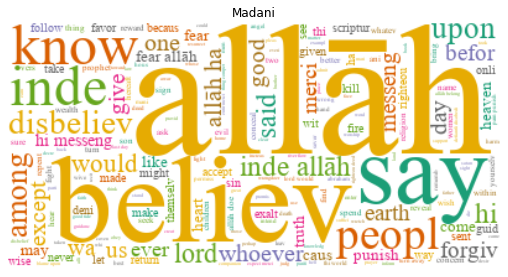

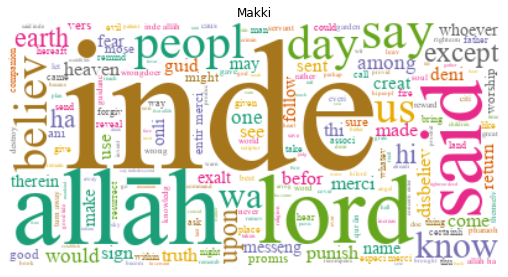

In [43]:
wc = WordCloud(stopwords=stopwords.words("english"), background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42, font_path="../font/times.ttf"
               )

for i in [0,1]:
    wc.generate(E_nuzol.stemmed_verses[i])

    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1+i)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(nuzol.index[i], color="black")

## Conclusion

- surly the number of Madani chapters is less than the number of Makki chapters
- moreover, the Madani chapters are (on avrage) much longer than Makki chapters
- but we can say they are signefeqently differant in their contaent base only on our word clouds